# Exploratory Data Analysis

##Dependencies
1.**numpy**: Used for mathematical operations on array

2.**matplotlib**: Plotting library (used for plotting graphs)

3.**pandas**: Python Data Analysis Library 

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path_QA_pairs  = "/content/drive/MyDrive/ImageClef-2019-VQA-Med-Training/All_QA_Pairs_train.txt"
path_QA_modality = "/content/drive/MyDrive/ImageClef-2019-VQA-Med-Training/QAPairsByCategory/C1_Modality_train.txt"
path_QA_plane ='/content/drive/MyDrive/ImageClef-2019-VQA-Med-Training/QAPairsByCategory/C2_Plane_train.txt'
path_QA_organ ='/content/drive/MyDrive/ImageClef-2019-VQA-Med-Training/QAPairsByCategory/C3_Organ_train.txt'
path_QA_abnormality ='/content/drive/MyDrive/ImageClef-2019-VQA-Med-Training/QAPairsByCategory/C4_Abnormality_train.txt'

obj_QA_pairs  = open(path_QA_pairs,  "r")
obj_QA_modality = open(path_QA_modality, "r")
obj_QA_plane = open(path_QA_plane, "r")
obj_QA_organ = open(path_QA_organ, "r")
obj_QA_abnormality = open(path_QA_abnormality, "r")



##Converting text data to dataframe

In [ ]:
df_QA_pairs  = pd.read_csv(path_QA_pairs, error_bad_lines=False, delimiter="|",header=None)
df_QA_modality = pd.read_csv(path_QA_modality,error_bad_lines=False, delimiter="|",header=None)
df_QA_plane = pd.read_csv(path_QA_plane,error_bad_lines=False, delimiter="|",header=None)
df_QA_organ = pd.read_csv(path_QA_organ,error_bad_lines=False, delimiter="|",header=None)
df_QA_abnormality = pd.read_csv(path_QA_abnormality,error_bad_lines=False, delimiter="|",header=None)

df_QA_pairs

,0,1,2
0,synpic41148,what kind of image is this?,cta - ct angiography
1,synpic43984,is this a t1 weighted image?,no
2,synpic38930,what type of imaging modality is used to acqui...,us - ultrasound
3,synpic52143,is this a noncontrast mri?,no
4,synpic20934,what type of image modality is this?,xr - plain film
...,...,...,...
12787,synpic35685,is this image normal?,yes
12788,synpic35687,is there something wrong in the image?,no
12789,synpic35701,is there evidence of any abnormalities?,no
12790,synpic48036,is the ct scan normal?,yes


##Renaming column names 

In [ ]:
dict_column={0:'id',1:'questions',2:'answers'}
df_QA_pairs.rename(columns = dict_column, inplace = True)
df_QA_modality.rename(columns = dict_column, inplace = True)
df_QA_plane.rename(columns = dict_column, inplace = True)
df_QA_organ.rename(columns = dict_column, inplace = True)
df_QA_abnormality.rename(columns = dict_column, inplace = True)



In [ ]:
df_QA_pairs

,id,questions,answers
0,synpic41148,what kind of image is this?,cta - ct angiography
1,synpic43984,is this a t1 weighted image?,no
2,synpic38930,what type of imaging modality is used to acqui...,us - ultrasound
3,synpic52143,is this a noncontrast mri?,no
4,synpic20934,what type of image modality is this?,xr - plain film
...,...,...,...
12787,synpic35685,is this image normal?,yes
12788,synpic35687,is there something wrong in the image?,no
12789,synpic35701,is there evidence of any abnormalities?,no
12790,synpic48036,is the ct scan normal?,yes


##Grouped questions with respective to ID

In [ ]:
def questions(i):
  g=df_QA_pairs.groupby('id')
  g.first()
  question_answer_pairs=g.get_group(i)
  return question_answer_pairs
questions('synpic100108')


,questions,answers
1287,what modality is used to take this image?,xr - plain film
4487,what plane is demonstrated?,lateral
7687,what is the organ system in this image?,breast
10887,what is abnormal in the x-ray?,topic: lumbar instability: functional and anat...


#Exploring pair training data (text)


##Modality data

In [ ]:
df_QA_modality

,id,questions,answers
0,synpic41148,what kind of image is this?,cta - ct angiography
1,synpic43984,is this a t1 weighted image?,no
2,synpic38930,what type of imaging modality is used to acqui...,us - ultrasound
3,synpic52143,is this a noncontrast mri?,no
4,synpic20934,what type of image modality is this?,xr - plain film
...,...,...,...
3195,synpic35685,is this a t2 weighted image?,no
3196,synpic35687,is this a t2 weighted image?,no
3197,synpic35701,what imaging modality was used to take this im...,mr - t1w - noncontrast
3198,synpic48036,is this a noncontrast ct?,yes


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Plane data

In [ ]:
df_QA_plane

,id,questions,answers
0,synpic41148,which plane is this image taken?,axial
1,synpic43984,which plane is this image taken?,axial
2,synpic38930,what plane is this ultrasound in?,longitudinal
3,synpic52143,which plane is the image shown in?,coronal
4,synpic20934,in what plane is this x-ray?,lateral
...,...,...,...
3195,synpic35685,in what plane is this mri?,sagittal
3196,synpic35687,which plane is this image in?,sagittal
3197,synpic35701,what is the plane of the image?,sagittal
3198,synpic48036,what imaging plane is depicted here?,axial


##Organ data

In [ ]:
df_QA_organ

,id,questions,answers
0,synpic41148,which organ is captured by this ct scan?,"lung, mediastinum, pleura"
1,synpic43984,what organ system is primarily present in this...,skull and contents
2,synpic38930,which organ system is imaged?,genitourinary
3,synpic52143,the mri shows what organ system?,spine and contents
4,synpic20934,what organ system is shown in this x-ray?,spine and contents
...,...,...,...
3195,synpic35685,what organ is this mri showing?,heart and great vessels
3196,synpic35687,what organ system is shown in the image?,heart and great vessels
3197,synpic35701,what organ system is displayed in this mri?,heart and great vessels
3198,synpic48036,which organ system is shown in the ct scan?,skull and contents


##Abnormality data

In [ ]:
df_QA_abnormality

,id,questions,answers
0,synpic41148,what is abnormal in the ct scan?,cryptococcal pneumonia in an immunocompetent host
1,synpic43984,what abnormality is seen in the image?,arteriovenous malformation (avm)
2,synpic38930,what is the primary abnormality in this image?,ectopic pregnancy
3,synpic52143,what is the primary abnormality in this image?,bone tumor/ chordoma
4,synpic20934,what is the primary abnormality in this image?,burst fracture
...,...,...,...
3187,synpic35685,is this image normal?,yes
3188,synpic35687,is there something wrong in the image?,no
3189,synpic35701,is there evidence of any abnormalities?,no
3190,synpic48036,is the ct scan normal?,yes


##Showing distribution of different categories present in dataset

In [ ]:
len_modality=len(df_QA_modality)
len_plane=len(df_QA_plane)
len_organ=len(df_QA_organ)
len_abnormality=len(df_QA_abnormality)


In [ ]:
y=np.array([len_modality,len_plane,len_organ,len_abnormality])
mylabels=['modality','plane','organ','abnormality']


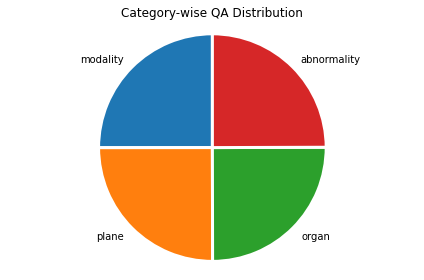

In [ ]:
plt.pie(y,labels=mylabels,startangle=90, shadow=False, wedgeprops={"edgecolor":"1",'linewidth': 3, 'antialiased': True})
plt.title("Category-wise QA Distribution")
plt.axis('equal')
plt.tight_layout()
plt.show() 

##Representation of abnormality data

In [ ]:
df_QA_abnormality

,id,questions,answers
0,synpic41148,what is abnormal in the ct scan?,cryptococcal pneumonia in an immunocompetent host
1,synpic43984,what abnormality is seen in the image?,arteriovenous malformation (avm)
2,synpic38930,what is the primary abnormality in this image?,ectopic pregnancy
3,synpic52143,what is the primary abnormality in this image?,bone tumor/ chordoma
4,synpic20934,what is the primary abnormality in this image?,burst fracture
...,...,...,...
3187,synpic35685,is this image normal?,yes
3188,synpic35687,is there something wrong in the image?,no
3189,synpic35701,is there evidence of any abnormalities?,no
3190,synpic48036,is the ct scan normal?,yes


In [ ]:
count_abnormality=0
count_abnormality_type=0
answers=['yes','no']

#df.index[df[''] == i].tolist()
df_QA_abnormality['answers']
for i in df_QA_abnormality['answers']:
  if i in answers:
    count_abnormality=count_abnormality+1
  else:
    count_abnormality_type=count_abnormality_type+1



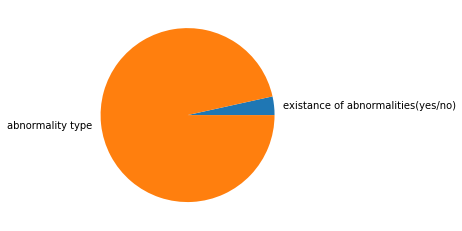

In [ ]:
y1=np.array([count_abnormality,count_abnormality_type])
mylabel=['existance of abnormalities(yes/no)','abnormality type']
plt.pie(y1,labels=mylabel)
plt.show()

##Distribution of in Organ data

In [ ]:
df_QA_organ

,id,questions,answers
0,synpic41148,which organ is captured by this ct scan?,"lung, mediastinum, pleura"
1,synpic43984,what organ system is primarily present in this...,skull and contents
2,synpic38930,which organ system is imaged?,genitourinary
3,synpic52143,the mri shows what organ system?,spine and contents
4,synpic20934,what organ system is shown in this x-ray?,spine and contents
...,...,...,...
3195,synpic35685,what organ is this mri showing?,heart and great vessels
3196,synpic35687,what organ system is shown in the image?,heart and great vessels
3197,synpic35701,what organ system is displayed in this mri?,heart and great vessels
3198,synpic48036,which organ system is shown in the ct scan?,skull and contents


In [ ]:
skull_and_contents_count=0
musculoskeletal_count=0
spine_and_contents_count=0
gastrointestinal_count=0
lung_mediastinum_pleura_count=0
genitourinary_count=0
face_sinuses_and_neck_count=0
vascular_and_lymphatic_count=0
heart_and_great_vessels_count=0
breast_count=0


for i in df_QA_organ['answers']:
  if i=='skull and contents':
    skull_and_contents_count=skull_and_contents_count+1
  elif i=='musculoskeletal':
    musculoskeletal_count=musculoskeletal_count+1
  elif i=='spine and contents':
    spine_and_contents_count=spine_and_contents_count+1
  elif i=='gastrointestinal':
    gastrointestinal_count=gastrointestinal_count+1
  elif i=='lung, mediastinum, pleura':
    lung_mediastinum_pleura_count=lung_mediastinum_pleura_count+1
  elif i=='genitourinary':
    genitourinary_count=genitourinary_count+1
  elif i=='face, sinuses, and neck':
    face_sinuses_and_neck_count=face_sinuses_and_neck_count+1
  elif i=='vascular and lymphatic':
    vascular_and_lymphatic_count=vascular_and_lymphatic_count+1
  elif i=='heart and great vessels':
    heart_and_great_vessels_count=heart_and_great_vessels_count+1
  elif i=='breast':
    breast_count=breast_count+1

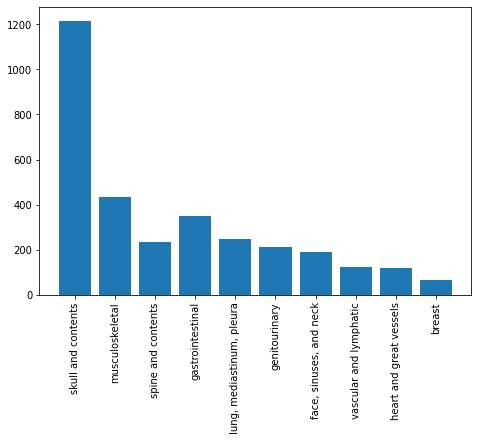

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
types = ['skull and contents','musculoskeletal','spine and contents','gastrointestinal','lung, mediastinum, pleura','genitourinary','face, sinuses, and neck','vascular and lymphatic','heart and great vessels','breast']
values = [skull_and_contents_count,musculoskeletal_count,spine_and_contents_count,gastrointestinal_count,lung_mediastinum_pleura_count,genitourinary_count,face_sinuses_and_neck_count,vascular_and_lymphatic_count,heart_and_great_vessels_count,breast_count]
ax.bar(types,values)
plt.xticks(rotation='vertical')
plt.show()

##Distribution of plane data

In [ ]:
df_QA_plane

,id,questions,answers
0,synpic41148,which plane is this image taken?,axial
1,synpic43984,which plane is this image taken?,axial
2,synpic38930,what plane is this ultrasound in?,longitudinal
3,synpic52143,which plane is the image shown in?,coronal
4,synpic20934,in what plane is this x-ray?,lateral
...,...,...,...
3195,synpic35685,in what plane is this mri?,sagittal
3196,synpic35687,which plane is this image in?,sagittal
3197,synpic35701,what is the plane of the image?,sagittal
3198,synpic48036,what imaging plane is depicted here?,axial


In [ ]:
axial_count=0
longitudinal_count=0
coronal_count=0
lateral_count=0
sagittal_count=0
frontal_count=0
ap_count=0
pa_count=0
mammo_mlo_count=0
transverse_count=0
oblique_count=0
mammo_mag_cc_count=0
d_reconstruction_count=0
for i in df_QA_plane['answers']:
  if i=='axial':
    axial_count=axial_count+1
  elif i=='longitudinal':
    longitudinal_count=longitudinal_count+1
  elif i=='coronal':
    coronal_count=coronal_count+1
  elif i=='lateral':
    lateral_count=lateral_count+1
  elif i=='sagittal':
    sagittal_count=sagittal_count+1
  elif i=='frontal':
    frontal_count=frontal_count+1
  elif i=='ap':
    ap_count=ap_count+1
  elif i=='pa':
    pa_count=pa_count+1
  elif i=='mammo - mlo':
    mammo_mlo_count=mammo_mlo_count+1
  elif i=='transverse':
    transverse_count=transverse_count+1
  elif i=='oblique':
    oblique_count=oblique_count+1
  elif i=='mammo - mag cc':
    mammo_mag_cc_count=mammo_mag_cc_count+1
  elif i=='3d reconstruction':
    d_reconstruction_count=d_reconstruction_count+1

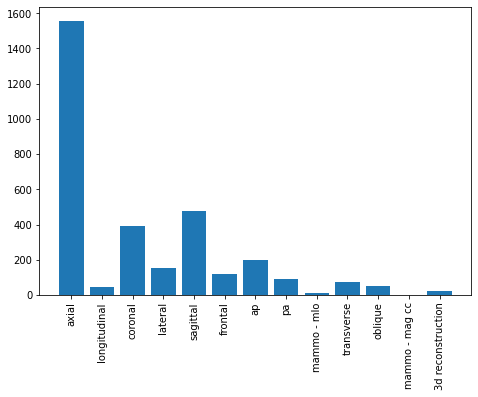

In [ ]:
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])
type = ['axial','longitudinal','coronal','lateral','sagittal','frontal','ap','pa','mammo - mlo','transverse','oblique','mammo - mag cc','3d reconstruction']
value = [axial_count,longitudinal_count,coronal_count,lateral_count,sagittal_count,frontal_count,ap_count,pa_count,mammo_mlo_count,transverse_count,oblique_count,mammo_mag_cc_count,d_reconstruction_count]
axis.bar(type,value)
plt.xticks(rotation='vertical')
plt.show()

##Distribution of modality data

In [ ]:
df_QA_modality

,id,questions,answers
0,synpic41148,what kind of image is this?,cta - ct angiography
1,synpic43984,is this a t1 weighted image?,no
2,synpic38930,what type of imaging modality is used to acqui...,us - ultrasound
3,synpic52143,is this a noncontrast mri?,no
4,synpic20934,what type of image modality is this?,xr - plain film
...,...,...,...
3195,synpic35685,is this a t2 weighted image?,no
3196,synpic35687,is this a t2 weighted image?,no
3197,synpic35701,what imaging modality was used to take this im...,mr - t1w - noncontrast
3198,synpic48036,is this a noncontrast ct?,yes


In [ ]:
modality_count = {}
for answer in df_QA_modality['answers']:
  if modality_count.get(answer) == None:
    modality_count[answer] = 1
  else:
    modality_count[answer] += 1
modality_count


{'an - angiogram': 78,
 'bas - barium swallow': 23,
 'be - barium enema': 10,
 'contrast': 87,
 'ct - gi & iv contrast': 11,
 'ct - myelogram': 2,
 'ct noncontrast': 71,
 'ct w/contrast (iv)': 38,
 'ct with gi and iv contrast': 13,
 'ct with gi contrast': 3,
 'ct with iv contrast': 45,
 'cta - ct angiography': 45,
 'flair': 58,
 'gi': 1,
 'gi and iv': 12,
 'iv': 42,
 'mammograph': 24,
 'mr - adc map (app diff coeff)': 16,
 'mr - dwi diffusion weighted': 30,
 'mr - fiesta': 3,
 'mr - flair': 78,
 'mr - flair w/gd': 3,
 'mr - other pulse seq.': 22,
 'mr - pdw proton density': 18,
 'mr - stir': 5,
 'mr - t1w - noncontrast': 32,
 'mr - t1w w/gadolinium': 29,
 'mr - t1w w/gd (fat suppressed)': 7,
 'mr - t2 weighted': 47,
 'mr t2* gradient,gre,mpgr,swan,swi': 6,
 'mra - mr angiography/venography': 24,
 'nm - nuclear medicine': 18,
 'no': 631,
 'noncontrast': 100,
 'pet - positron emission': 3,
 'sbft - small bowel': 7,
 't1': 131,
 't2': 205,
 'ugi - upper gi': 14,
 'us - ultrasound': 183,
 

In [ ]:
compressed_modality_count = {"AN": 78, "BA": 33, "CT": 228, "GI": 27, "IV": 42, "Mammograph": 24, "MR": 320, "PET": 3, "SBFT": 7, "US":196, "Venogram": 3, "XR": 456, "Flair": 58, "Yes/No": 1184, "Contrast/Non-contrast": 187, "T1/T2": 336, "NM": 18, }
modality_categories = list(compressed_modality_count.keys())
modality_values = list(compressed_modality_count.values())

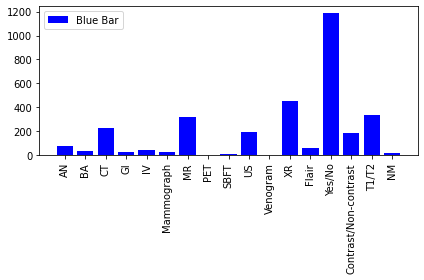

In [ ]:
x1 = modality_categories
y1 = modality_values

plt.bar(x1, y1, label="Blue Bar", color='b')
# plt.bar(x2, y2, label="Green Bar", color='g')
plt.plot()

plt.legend()
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()